In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

In [27]:
import Augmentor

In [30]:
p = Augmentor.Pipeline("C:/FRANTISEK/SKOLA FIIT/bakalarka/BP_PROSTATEx/data")

Initialised with 3 image(s) found.
Output directory set to C:/FRANTISEK/SKOLA FIIT/bakalarka/BP_PROSTATEx/data\output.

In [31]:
p.rotate_without_crop(probability=0.7, max_left_rotation=90, max_right_rotation=90)
# p.crop_by_size( probability = 1, width = 20, height = 20, centre=True)

In [32]:
p.sample(5)
p.process()

Processing <PIL.Image.Image image mode=RGB size=20x20 at 0x26A10D9C3C8>: 100%|████| 5/5 [00:00<00:00, 169.03 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=20x20 at 0x26A10C7DBE0>: 100%|█████| 3/3 [00:00<00:00, 91.37 Samples/s]


In [ ]:
p = Augmentor.DataPipeline(images, [1,0,1])

In [34]:
import cv2
import glob


In [50]:
images = [cv2.imread(file) for file in glob.glob("C:/FRANTISEK/SKOLA FIIT/bakalarka/BP_PROSTATEx/data/*png")]

In [51]:
import matplotlib.pyplot as plt

In [52]:
len(images)

5

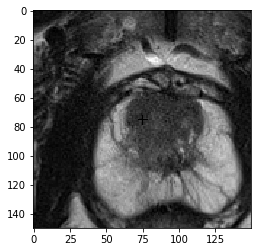

In [58]:
plt.imshow(images[1])

In [59]:
images

[array([[[171, 171, 171],
         [150, 150, 150],
         [ 73,  73,  73],
         ...,
         [ 98,  98,  98],
         [ 64,  64,  64],
         [ 49,  49,  49]],
 
        [[132, 132, 132],
         [140, 140, 140],
         [111, 111, 111],
         ...,
         [ 99,  99,  99],
         [ 76,  76,  76],
         [ 50,  50,  50]],
 
        [[105, 105, 105],
         [ 88,  88,  88],
         [ 98,  98,  98],
         ...,
         [ 88,  88,  88],
         [ 71,  71,  71],
         [ 71,  71,  71]],
 
        ...,
 
        [[119, 119, 119],
         [152, 152, 152],
         [ 90,  90,  90],
         ...,
         [197, 197, 197],
         [174, 174, 174],
         [166, 166, 166]],
 
        [[153, 153, 153],
         [109, 109, 109],
         [ 98,  98,  98],
         ...,
         [162, 162, 162],
         [163, 163, 163],
         [176, 176, 176]],
 
        [[128, 128, 128],
         [ 81,  81,  81],
         [156, 156, 156],
         ...,
         [167, 167, 167],
  

In [47]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=x_test.shape))
print("Test set (labels) shape: {shape}".format(shape=y_test.shape))

Training set (images) shape: (60000, 28, 28)
Training set (labels) shape: (60000,)
Test set (images) shape: (10000, 28, 28)
Test set (labels) shape: (10000,)


In [21]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5,1,'(Label: T-shirt/top)')

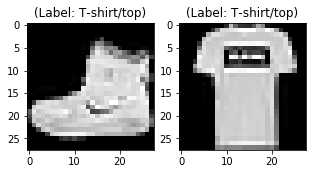

In [25]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (28,28))
curr_lbl = np.argmax(y_train[0])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_train[1], (28,28))
curr_lbl = np.argmax(y_train[1])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

In [48]:
 y_train.one_hot(y_train, 10)

AttributeError: 'numpy.ndarray' object has no attribute 'one_hot'

In [44]:
y_train[0]

<tf.Tensor 'strided_slice:0' shape=(10,) dtype=float32>

In [46]:
np.max(y_train[0])

<tf.Tensor 'strided_slice_1:0' shape=(10,) dtype=float32>

In [27]:
np.min(x_train[0])

0

In [28]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [30]:
training_iters = 200 
learning_rate = 0.001 
batch_size = 128

In [31]:
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

In [32]:
#both placeholders are of type float
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

In [33]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

In [34]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

In [35]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [37]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [39]:
#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [40]:
# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()